### About this notebook

This notebook now calls the reusable module `models/activity_timing.py`.
The module performs:
- impact trading day mapping (US/Eastern, 4pm rule)
- daily aggregation of post counts
- LOWESS smoothing and thresholding
- spike feature engineering
- optional price overlay plotting

Spike features are computed inside `models/activity_timing.py`:
- spike_presence (0/1)
- spike_intensity (float)

### TSLA

/Users/hwang-yejin/Desktop/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/models/activity_timing.py:155: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


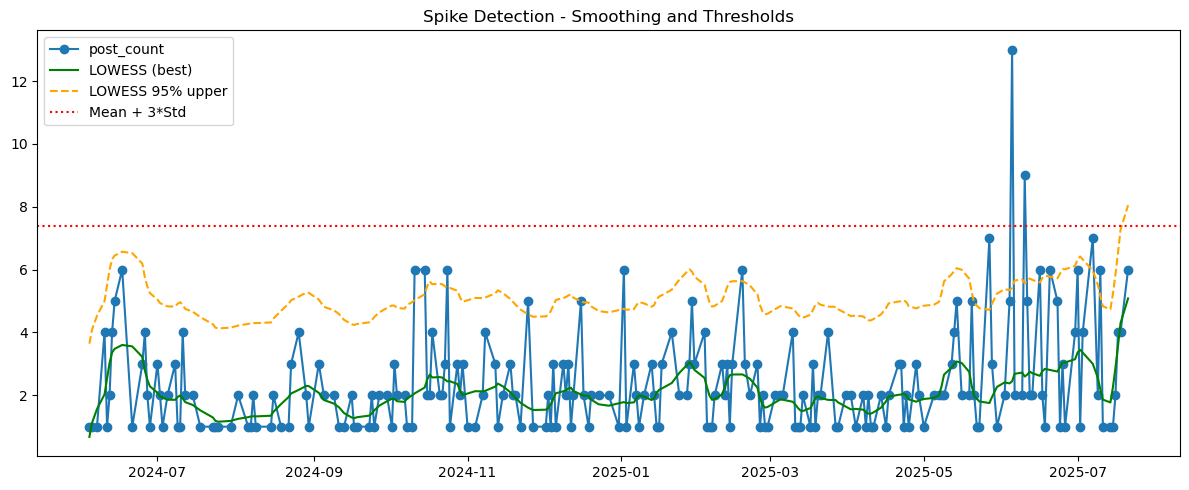

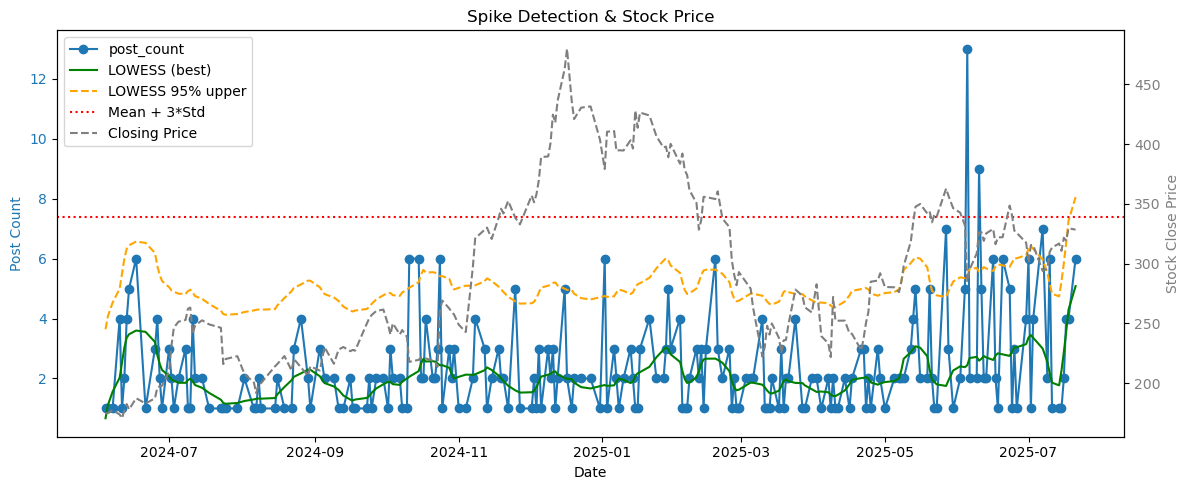

,impact_trading_day,post_count,smoothed,spike_presence,spike_intensity,loess_upper
0,2024-06-04,1,0.673383,0,0.0,3.642278
1,2024-06-05,1,1.109686,0,0.0,4.078581
2,2024-06-07,1,1.559878,0,0.0,4.528773
3,2024-06-10,4,2.027008,0,0.0,4.995903
4,2024-06-11,1,2.518650,0,0.0,5.487545


In [4]:
# This notebook now delegates logic to models/activity_timing.py
from pathlib import Path
from datetime import datetime

import pandas as pd

# Allow running the module when executing the notebook from notebooks/
import sys
cwd = Path.cwd().resolve()
PROJECT_ROOT = cwd.parent if cwd.name == 'notebooks' else cwd
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from models.activity_timing import run_activity_timing

INPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy_recognition' / 'tesla_sentiment.csv'
OUTPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy_recognition' / 'tsla_spike_data.csv'

result = run_activity_timing(
    input_csv=str(INPUT_CSV),
    output_csv=str(OUTPUT_CSV),
    ticker='TSLA',
    show_plots=True,
)

result.head()


Spike features are computed inside `models/activity_timing.py`:
- spike_presence (0/1)
- spike_intensity (float)

In [ ]:
# Moved to models/activity_timing.py
# This cell is intentionally left minimal to avoid duplication.

### NVDA

/Users/hwang-yejin/Desktop/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/models/activity_timing.py:155: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


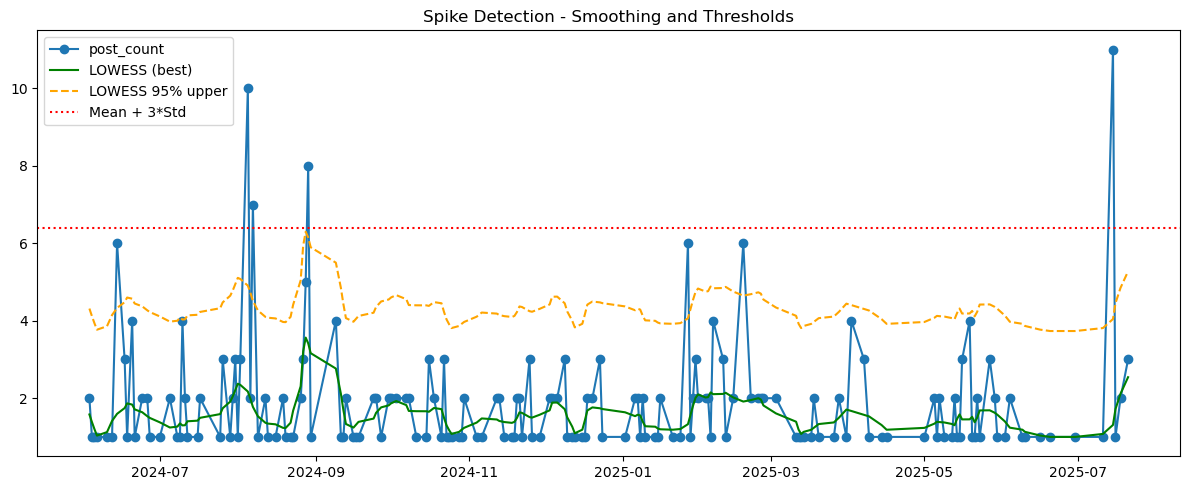

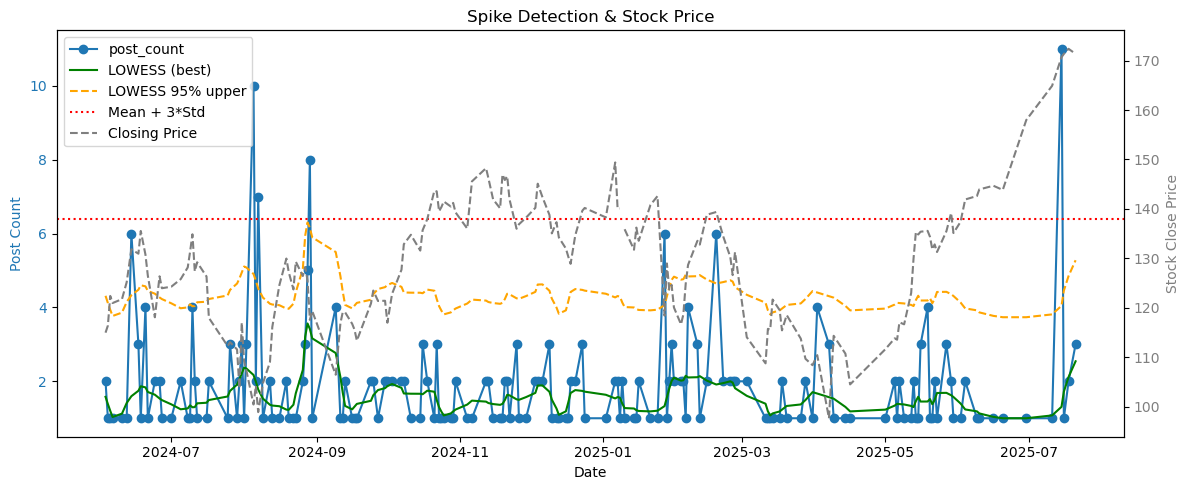

,impact_trading_day,post_count,smoothed,spike_presence,spike_intensity,loess_upper
0,2024-06-03,2,1.579968,0,0.0,4.314528
1,2024-06-04,1,1.385009,0,0.0,4.119570
2,2024-06-05,1,1.202146,0,0.0,3.936706
3,2024-06-06,1,1.034159,0,0.0,3.768719
4,2024-06-10,1,1.124518,0,0.0,3.859079


In [5]:
# This notebook now delegates logic to models/activity_timing.py
from pathlib import Path
from datetime import datetime

import pandas as pd

# Allow running the module when executing the notebook from notebooks/
import sys
cwd = Path.cwd().resolve()
PROJECT_ROOT = cwd.parent if cwd.name == 'notebooks' else cwd
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from models.activity_timing import run_activity_timing

INPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy_recognition' / 'nvda_sentiment.csv'
OUTPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy_recognition' / 'nvda_spike_data.csv'

# NOTE: You can analyze NVDA price data by simply changing the ticker to 'NVDA' in the activity_timing.py function!
result = run_activity_timing(
    input_csv=str(INPUT_CSV),
    output_csv=str(OUTPUT_CSV),
    ticker='NVDA', # ticker : NVDA 
    show_plots=True,
)

result.head()

## BYND

/Users/hwang-yejin/Desktop/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/models/activity_timing.py:155: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


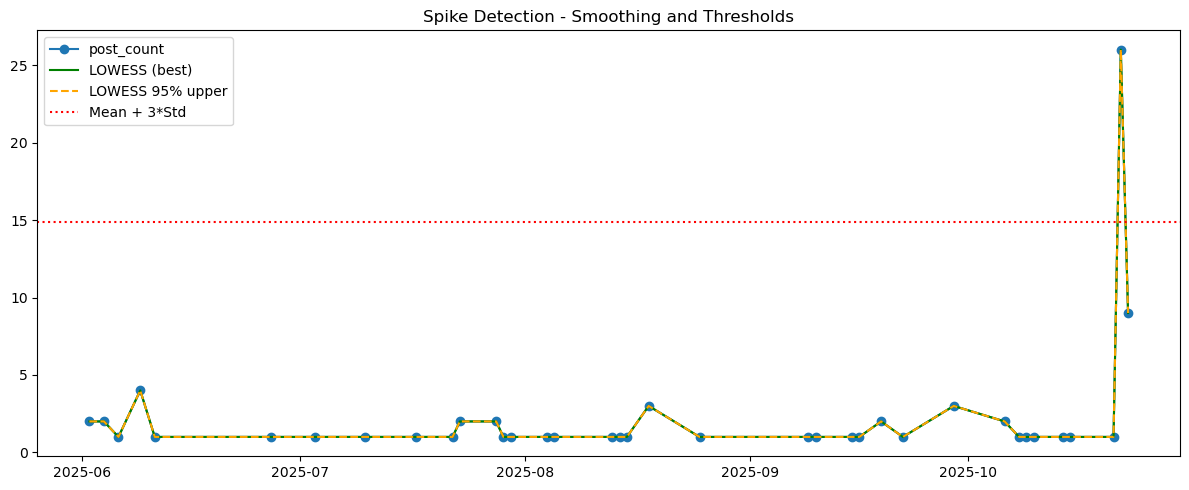

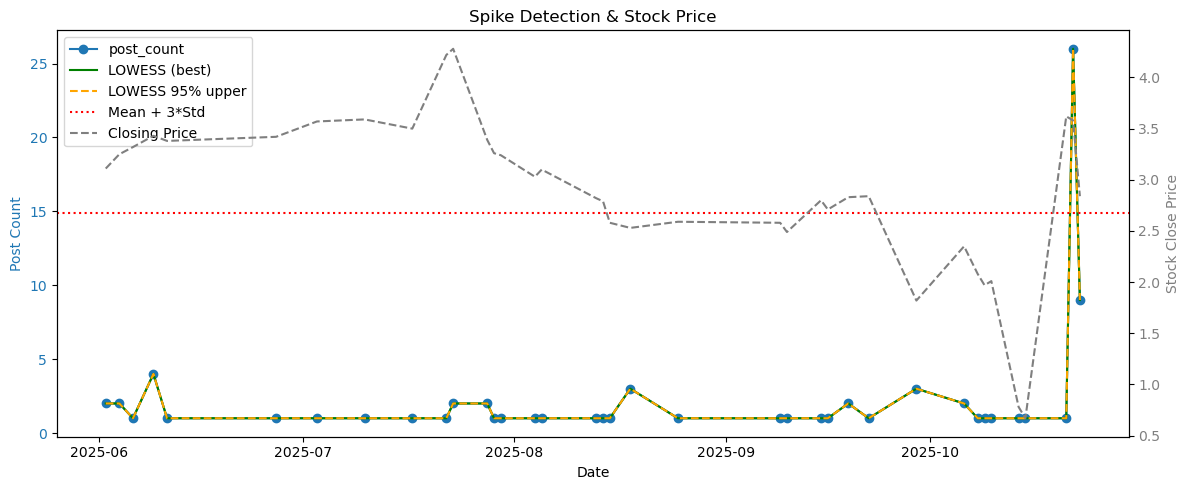

,impact_trading_day,post_count,smoothed,spike_presence,spike_intensity,loess_upper
0,2025-06-02,2,2.0,0,0.0,2.0
1,2025-06-04,2,2.0,0,0.0,2.0
2,2025-06-06,1,1.0,0,0.0,1.0
3,2025-06-09,4,4.0,0,0.0,4.0
4,2025-06-11,1,1.0,0,0.0,1.0


In [1]:
# This notebook now delegates logic to models/activity_timing.py
from pathlib import Path
from datetime import datetime

import pandas as pd

# Allow running the module when executing the notebook from notebooks/
import sys
cwd = Path.cwd().resolve()
PROJECT_ROOT = cwd.parent if cwd.name == 'notebooks' else cwd
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from models.activity_timing import run_activity_timing

INPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy_recognition' / 'bynd_sentiment_1024.csv'
OUTPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy_recognition' / 'bynd_spike_data.csv'

# NOTE: You can analyze NVDA price data by simply changing the ticker to 'NVDA' in the activity_timing.py function!
result = run_activity_timing(
    input_csv=str(INPUT_CSV),
    output_csv=str(OUTPUT_CSV),
    ticker='BYND', # ticker : NVDA 
    show_plots=True,
)

result.head()

/Users/hwang-yejin/Desktop/Financial Time Series Forecasting with Deep Learning Models and Social Media Sentiment/models/activity_timing.py:155: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


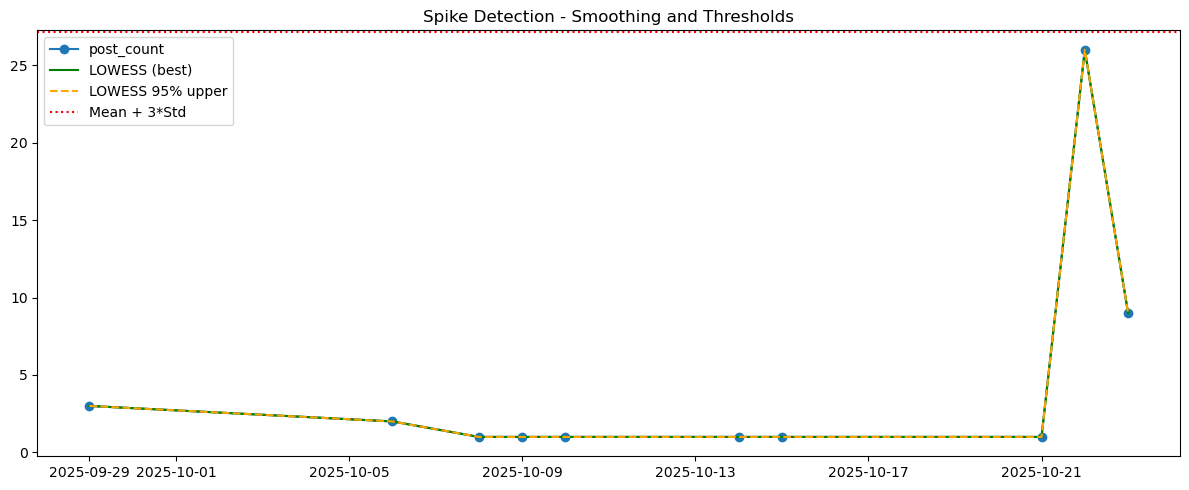

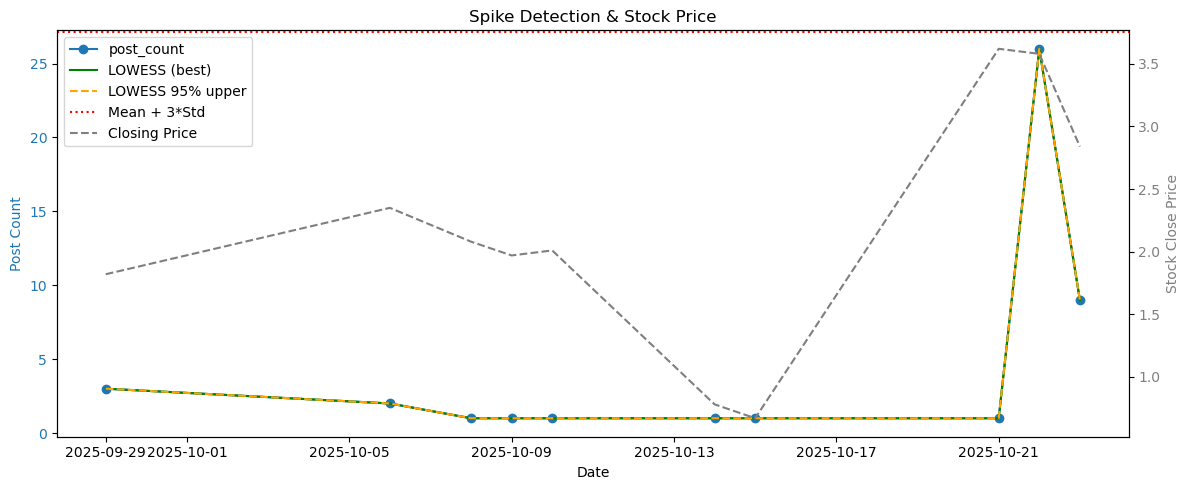

In [4]:
import pandas as pd
from models.activity_timing import (
  aggregate_daily_post_counts, smooth_and_threshold,
  download_close_prices, plot_results
)

# 1) 입력 CSV (레딧 원본: datetime 컬럼 포함)
# 예: bynd 파이프라인 원본이면 아래 경로 교체
INPUT_CSV = PROJECT_ROOT / 'data' / 'interim' / 'activitiy_recognition' / 'bynd_sentiment_1024.csv'
TICKER = 'BYND'

# 2) 일별 집계
df = pd.read_csv(INPUT_CSV)
daily = aggregate_daily_post_counts(df, tz='US/Eastern')

# 3) 최근 30일 필터
dates = pd.to_datetime(daily['impact_trading_day'])
cutoff = dates.max() - pd.Timedelta(days=30)
recent = daily.loc[dates >= cutoff].reset_index(drop=True)

# 4) LOWESS/상단밴드/기준선
smoothed, loess_upper, _ = smooth_and_threshold(recent)
mean_plus_3std = float(recent['post_count'].mean() + 3.0 * recent['post_count'].std(ddof=0))

# 5) 종가(선택) + 플롯
try:
  close = download_close_prices(recent['impact_trading_day'], ticker=TICKER)
except Exception:
  close = None

plot_results(
  recent[['impact_trading_day', 'post_count']],
  smoothed, loess_upper, mean_plus_3std,
  close_price=close
)